# Wiener Filter

Resources:

- Kay 2006 Intuitive Probability and Random Processes using MATLAB, Section 18.5-18.8
- [Uney 2017 Optimal and Adaptive Filtering](https://udrc.eng.ed.ac.uk/sites/udrc.eng.ed.ac.uk/files/attachments/Optimal%20adaptive%20filtering%20slides.pdf)
- <https://probability4datascience.com/python10.html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.linalg

## Generate input, ouput, and impulse response

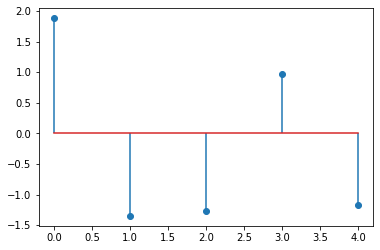

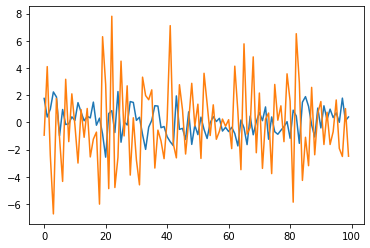

In [2]:
N = 100
L = 5
P = L

np.random.seed(0)

x = np.random.randn(N)
h = np.random.randn(L)
y = np.convolve(x, h, "same")

fig, ax = plt.subplots()
ax.stem(h)

fig, ax = plt.subplots()
plt.plot(x)
plt.plot(y)

pass

## Estimate impulse response

In [3]:
# Input-output cross-correlation
ryx = np.array([
    np.sum(x[:N-k] * y[k:])
    for k in range(P)
])

# Input auto-correlation
rxx = np.array([
    np.sum(x[:N-k] * x[k:])
    for k in range(P)
])

# Output auto-correlation
ryy = np.array([
    np.sum(y[:N-k] * y[k:])
    for k in range(P)
])

In [4]:
h_est = scipy.linalg.solve_toeplitz(rxx, ryx)

y_est = np.convolve(x, h_est, "same")
mse = np.mean((y - y_est)**2)

[ 1.8831507  -1.34775906 -1.270485    0.96939671 -1.17312341]
[-1.07728572  0.82596411 -1.32467055  0.10752081  0.12966629]
14.901616562607678


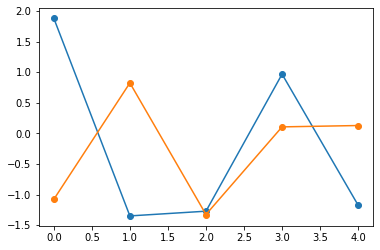

In [5]:
print(h)
print(h_est)
print(mse)
plt.plot(h, "o-")
plt.plot(h_est, "o-")

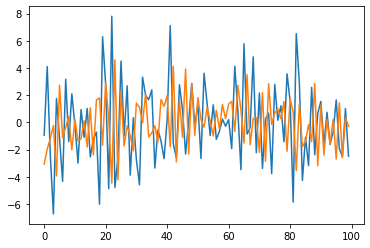

In [6]:
plt.plot(y, "-")
plt.plot(y_est, "-")